# Fastai Experimentation

This notebook is intended to be used after running the google image scraper in this repo. To get started follow the README.md in this repo, then come back after all the csv files have been generated, labeled, and saved in the data_csv directory.

In [1]:
from fastai.vision import *
import os
path = Path(f'../../data_csv')

### Define Experiment
Running this cell will save the images and any saved models in a directory with the experiments name.

In [2]:
experiment = 'trees_and_leaves_v3'

In [3]:
dest_path = Path(f'../../data')
img_path = dest_path/experiment

## Verify Images can be Trained

In [4]:
classes = os.listdir(f'../../data/{experiment}')
for c in classes:
    print(c)
#     verify_images(img_path/c, delete=True, max_size=500)

Katsura_tree
Japanese_Spice_Tree
silk_tree
Japanese_Pagoda_Tree
maidenhair_tree
Gerard_pea_tree
strawberry_tree
exported.pkl
Smiling_Forest_Lily_Tree
Japanese_Tree_Lilac
Hop_Tree
models
Franklin_Tree
Pepper_Tree
Japanese_Raisin_Tree
Camphor_Tree
Tulip_Tree
Golden_Chain_Tree
Chinese_Tulip_Tree
Buddhaism_tree
Toothache_tree
Dove_Tree
Fragrant_Epaulette_Tree
Isu_tree
Amur_Cork_Tree
Iigiri_Tree
tree_of_heaven
Purple_Smoketree
California_Hoptree
Siberian_pea-tree
spindletree
Orange_ball_tree
Golden_Rain_Tree
Bigleaf_Cucumber_Tree
Yellow_Willow_Tree
fringe_tree
Hardy_Silk_Tree
Kentucky_coffee_tree
servicetree
London_Plane_Tree
tree_anemone
royal_paulownia
Henry_anise_tree
Wheel_Tree
Tree_Peony
Korean_Bee-Bee_Tree
Sourwood_Tree
alpine_celery_tree
Wedding_Cake_Tree
Judas_tree
Chilean_lily-of-the-valley_tree


## Create ImageDataBunch for Training

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(img_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

## Show Classes to be Trained

In [6]:
data.classes

['Amur_Cork_Tree',
 'Bigleaf_Cucumber_Tree',
 'Buddhaism_tree',
 'California_Hoptree',
 'Camphor_Tree',
 'Chilean_lily-of-the-valley_tree',
 'Chinese_Tulip_Tree',
 'Dove_Tree',
 'Fragrant_Epaulette_Tree',
 'Franklin_Tree',
 'Gerard_pea_tree',
 'Golden_Chain_Tree',
 'Golden_Rain_Tree',
 'Hardy_Silk_Tree',
 'Henry_anise_tree',
 'Hop_Tree',
 'Iigiri_Tree',
 'Isu_tree',
 'Japanese_Pagoda_Tree',
 'Japanese_Raisin_Tree',
 'Japanese_Spice_Tree',
 'Japanese_Tree_Lilac',
 'Judas_tree',
 'Katsura_tree',
 'Kentucky_coffee_tree',
 'Korean_Bee-Bee_Tree',
 'London_Plane_Tree',
 'Orange_ball_tree',
 'Pepper_Tree',
 'Purple_Smoketree',
 'Siberian_pea-tree',
 'Smiling_Forest_Lily_Tree',
 'Sourwood_Tree',
 'Toothache_tree',
 'Tree_Peony',
 'Tulip_Tree',
 'Wedding_Cake_Tree',
 'Wheel_Tree',
 'Yellow_Willow_Tree',
 'alpine_celery_tree',
 'fringe_tree',
 'maidenhair_tree',
 'royal_paulownia',
 'servicetree',
 'silk_tree',
 'spindletree',
 'strawberry_tree',
 'tree_anemone',
 'tree_of_heaven']

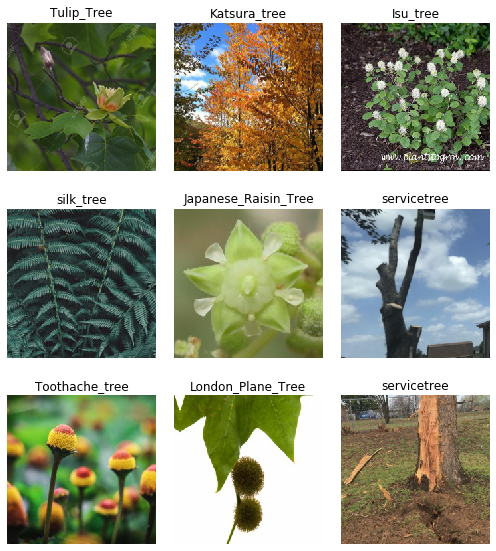

In [9]:
data.show_batch(rows=3, figsize=(7,8))

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Amur_Cork_Tree',
  'Bigleaf_Cucumber_Tree',
  'Buddhaism_tree',
  'California_Hoptree',
  'Camphor_Tree',
  'Chilean_lily-of-the-valley_tree',
  'Chinese_Tulip_Tree',
  'Dove_Tree',
  'Fragrant_Epaulette_Tree',
  'Franklin_Tree',
  'Gerard_pea_tree',
  'Golden_Chain_Tree',
  'Golden_Rain_Tree',
  'Hardy_Silk_Tree',
  'Henry_anise_tree',
  'Hop_Tree',
  'Iigiri_Tree',
  'Isu_tree',
  'Japanese_Pagoda_Tree',
  'Japanese_Raisin_Tree',
  'Japanese_Spice_Tree',
  'Japanese_Tree_Lilac',
  'Judas_tree',
  'Katsura_tree',
  'Kentucky_coffee_tree',
  'Korean_Bee-Bee_Tree',
  'London_Plane_Tree',
  'Orange_ball_tree',
  'Pepper_Tree',
  'Purple_Smoketree',
  'Siberian_pea-tree',
  'Smiling_Forest_Lily_Tree',
  'Sourwood_Tree',
  'Toothache_tree',
  'Tree_Peony',
  'Tulip_Tree',
  'Wedding_Cake_Tree',
  'Wheel_Tree',
  'Yellow_Willow_Tree',
  'alpine_celery_tree',
  'fringe_tree',
  'maidenhair_tree',
  'royal_paulownia',
  'servicetree',
  'silk_tree',
  'spindletree',
  'strawberry_tree',
  

In [11]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy], callback_fns=[
    partial(callbacks.EarlyStoppingCallback, monitor='accuracy', min_delta=0.01, patience=5)])

# Load Best Model, and Export for Production

In [12]:
learn.load('bestmodel')

Learner(data=ImageDataBunch;

Train: LabelList (86896 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Katsura_tree,Katsura_tree,Katsura_tree,Katsura_tree,Katsura_tree
Path: ../../data/trees_and_leaves_v3;

Valid: LabelList (21724 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Japanese_Spice_Tree,silk_tree,silk_tree,silk_tree,Orange_ball_tree
Path: ../../data/trees_and_leaves_v3;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(

In [13]:
import torch
import torch.nn as nn
import numpy as np
from onnx_coreml import convert
from torch.autograd import Variable
import torch.onnx
import torchvision
import onnx

In [60]:
import torchvision.models as models

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [15]:
model = learn.model

In [16]:
model = torch.nn.Sequential(model, torch.nn.Softmax(1))

In [17]:
model.eval()

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (downs

In [18]:
def save_model(model, device, path, name):
    base = path
    onnx_file = base.joinpath('{}.onnx'.format(name)).resolve()
    pth_file = base.joinpath('{}.pth'.format(name)).resolve()
    
    # create dummy variable to traverse graph
    x = torch.randint(255, (1,3,224, 224), dtype=torch.float).to(device) / 255
    torch.onnx.export(model, x, onnx_file)
    print('Saved onnx model to {}'.format(onnx_file))

In [20]:
save_model(model,device,Path(f'../../data/{experiment}'),'bestmodel')

Saved onnx model to /home/blakedanson/Desktop/repos/dataNotLore/data/trees_and_leaves_v3/bestmodel.onnx


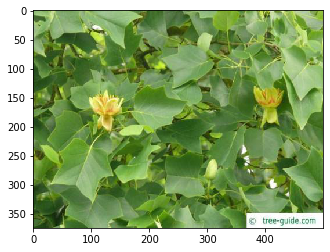

In [100]:
from PIL import Image
img = Image.open('../../data/trees_and_leaves_v3/Tulip_Tree/00000014.jpg')
plt.imshow(img)

In [101]:
from torchvision import transforms
transform = transforms.Compose([
 transforms.Resize(256),
 transforms.CenterCrop(224),
 transforms.ToTensor(),
 transforms.Normalize(
 mean=[0.485, 0.456, 0.406],
 std=[0.229, 0.224, 0.225]
 )])

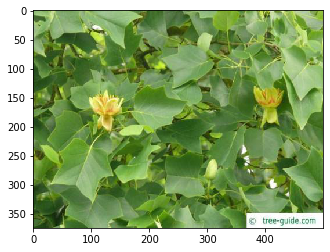

In [102]:
img_t = transform(img)
plt.imshow(img)
image = torch.unsqueeze(img_t, 0)
image = np.asarray(image).astype('float32')

In [103]:
import onnxruntime as rt

sess = rt.InferenceSession(f"../../data/{experiment}/bestmodel.onnx")
input_name = sess.get_inputs()[0].name
r = sess.run(None, {input_name: image})
# print("Shape={0} and predicted labels={1}".format(image.shape, r))
pred_onx = r
print(pred_onx)

[array([[2.074394e-06, 3.081975e-03, 3.019561e-06, 8.005158e-06, 2.442798e-06, 3.112991e-06, 1.987512e-01,
        1.299316e-06, 1.920949e-05, 4.474202e-07, 1.891628e-05, 4.212998e-06, 1.202494e-06, 1.545670e-05,
        2.388138e-05, 1.228291e-05, 5.649358e-06, 7.544077e-06, 6.704445e-07, 1.120628e-06, 4.720233e-06,
        2.261120e-06, 6.403058e-06, 1.286808e-05, 3.657809e-05, 3.985981e-06, 1.127356e-04, 2.145129e-05,
        1.283184e-07, 3.050035e-07, 1.682938e-05, 4.830535e-04, 1.633993e-05, 4.444198e-06, 1.740917e-06,
        7.966756e-01, 2.214257e-07, 7.206291e-07, 5.107787e-04, 4.143584e-07, 1.989733e-07, 7.075251e-05,
        6.375729e-06, 5.182902e-06, 1.768433e-05, 2.508871e-07, 2.089618e-05, 1.340364e-07, 3.439861e-06]],
      dtype=float32)]


In [104]:
labels = data.classes
print(labels)

['Amur_Cork_Tree', 'Bigleaf_Cucumber_Tree', 'Buddhaism_tree', 'California_Hoptree', 'Camphor_Tree', 'Chilean_lily-of-the-valley_tree', 'Chinese_Tulip_Tree', 'Dove_Tree', 'Fragrant_Epaulette_Tree', 'Franklin_Tree', 'Gerard_pea_tree', 'Golden_Chain_Tree', 'Golden_Rain_Tree', 'Hardy_Silk_Tree', 'Henry_anise_tree', 'Hop_Tree', 'Iigiri_Tree', 'Isu_tree', 'Japanese_Pagoda_Tree', 'Japanese_Raisin_Tree', 'Japanese_Spice_Tree', 'Japanese_Tree_Lilac', 'Judas_tree', 'Katsura_tree', 'Kentucky_coffee_tree', 'Korean_Bee-Bee_Tree', 'London_Plane_Tree', 'Orange_ball_tree', 'Pepper_Tree', 'Purple_Smoketree', 'Siberian_pea-tree', 'Smiling_Forest_Lily_Tree', 'Sourwood_Tree', 'Toothache_tree', 'Tree_Peony', 'Tulip_Tree', 'Wedding_Cake_Tree', 'Wheel_Tree', 'Yellow_Willow_Tree', 'alpine_celery_tree', 'fringe_tree', 'maidenhair_tree', 'royal_paulownia', 'servicetree', 'silk_tree', 'spindletree', 'strawberry_tree', 'tree_anemone', 'tree_of_heaven']


In [105]:
label = labels[np.argmax(pred_onx)]
print(f'Prediction: {label}')

Prediction: Tulip_Tree


In [106]:
max_activation = np.argmax(pred_onx)
confidence_score = pred_onx[0][0][max_activation]
print(f'Confidence score: {confidence_score}')

Confidence score: 0.7966755628585815


In [92]:
np.argmax(pred_onx[0])

23

In [107]:
print(list(map(lambda num: round(num,3),pred_onx[0][0])))

[0.0, 0.003, 0.0, 0.0, 0.0, 0.0, 0.199, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.797, 0.0, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [108]:
%%time
sess = rt.InferenceSession(f"../../data/{experiment}/bestmodel.onnx")
# input_name = sess.get_inputs()[0].name
r = sess.run(None, {input_name: image})
# print("Shape={0} and predicted labels={1}".format(image.shape, r))
pred_onx = r[0]
print(pred_onx)

[[2.074394e-06 3.081975e-03 3.019561e-06 8.005158e-06 2.442798e-06 3.112991e-06 1.987512e-01 1.299316e-06 1.920949e-05
  4.474202e-07 1.891628e-05 4.212998e-06 1.202494e-06 1.545670e-05 2.388138e-05 1.228291e-05 5.649358e-06 7.544077e-06
  6.704445e-07 1.120628e-06 4.720233e-06 2.261120e-06 6.403058e-06 1.286808e-05 3.657809e-05 3.985981e-06 1.127356e-04
  2.145129e-05 1.283184e-07 3.050035e-07 1.682938e-05 4.830535e-04 1.633993e-05 4.444198e-06 1.740917e-06 7.966756e-01
  2.214257e-07 7.206291e-07 5.107787e-04 4.143584e-07 1.989733e-07 7.075251e-05 6.375729e-06 5.182902e-06 1.768433e-05
  2.508871e-07 2.089618e-05 1.340364e-07 3.439861e-06]]
CPU times: user 738 ms, sys: 43.7 ms, total: 782 ms
Wall time: 126 ms
